<h1>Que es el deep learning?</h1>
<p><b>Inteligencia artificial</b></p>
<p>la inteligencia artificial son los intentos de replicar la inteligencia humana en sistemas artificiales</p>
<p><b>Deep learning</b></p>
<p>Es todo los relacionado con redes neuronales, se llama aprendizaje profundo porque a mayor capas conectadas entre si se obtiene un aprendizaje mas fino.</p>
<p><b>problemas del Deep learning</b></p>
<li><b>Overfitting:</b> es cuando el algoritmo "memoriza" lo datos y la red neuronal no sabe generalizar</li>
<li><b>Caja negra:</b>Nosotros conocemos las entradas de las redes neuronales. sin embargo, no conocemos que es lo que pasa dentr de las capas intermedias de la red.</li>

<h1>Primera red reuronal</h1>

In [2]:
import numpy as np 
import pandas as pd 

from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist

import matplotlib.pyplot as plt 

In [4]:
#cargar nuestro se de dato y labels
(train_data,train_labels),(test_data,test_tabels) = mnist.load_data()

In [8]:
train_data.shape

(60000, 28, 28)

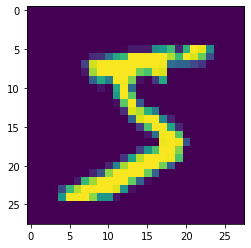

In [13]:
plt.imshow(train_data[0])

In [14]:
train_labels[0]

5

In [20]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
              metrics='accuracy')

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [30]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_tabels)

In [31]:
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2573 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1027 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9885


In [32]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 879us/step - loss: 0.0716 - accuracy: 0.9787


[0.07160881161689758, 0.9786999821662903]

<h1>La neurona : pequena y poderosa herramienta</h1>
La neurona, tambien llamada perceptron(nacida en los anos 50), esa inspirada en las redes neuronales biologicas.

El funcionamiento del perceptron se describe de la siguiente manera.
<li>se realiza una suma ponderada de las entradas con los pesos(weights w).Esto da como resultado una salida lineal</li>
<li>Estas salida se pasa por una funcion de activacion que introduce no linealidades al perceptron</li>
<li>Si el modelo no satisface de forma adecuada el problema entonces se itera. Se itera actulizando los pesoss hasta resolver el problema</li>

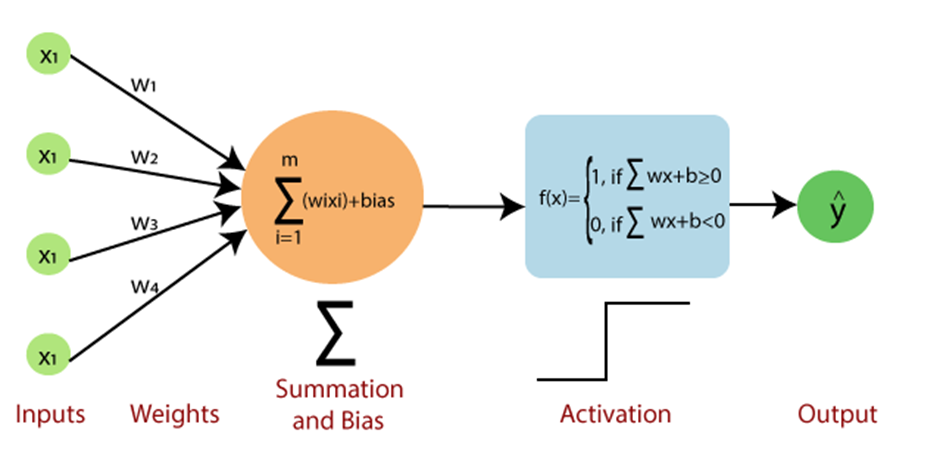

<h1>Arquitectura de la red neuronal</h1>
La arquitectura de una red puede ser dividida en tres partes : 
<li>Las capas de entrada en donde los datos son introducidos</li>
<li>Las capas de salida, que hace una prediccion</li>
<li>Las capas ocultas, que se encuentra entre las capas de entrada y salida. estas se encargan de relizar operaciones matematicas</li>

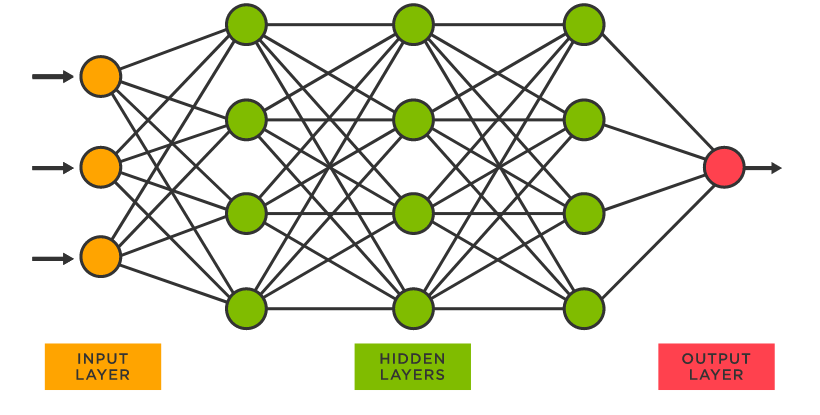

dentro de la arquitectura de la red neuronal ocurren muchas operaciones de 'producto punto'entre las entradas de cada perceptron con sus respectivos pesos. Estas operaciones son lineales. Las funciones de activacion son la solucion al colapso de las linealidades delas capas de la red neuronal.

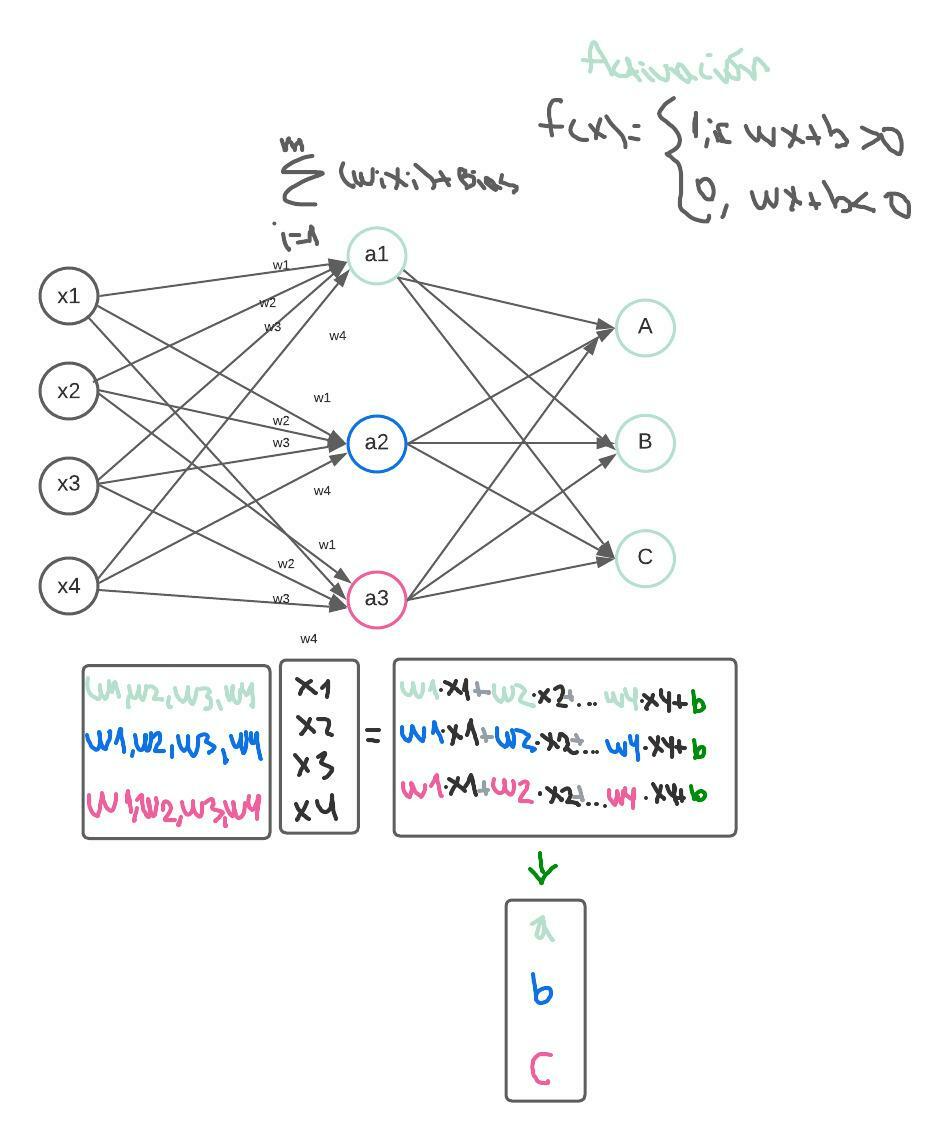


<h1>Funciones de activacion</h1>
no podemos acumular sumatorias consecutivas de lineas, ya que de este modo el resultado final seria una linea y se pierde todo el resultado esperado.

<b>funciones de activacon</b>
<li><b>Discretas:</b> Conjunto finito de valores</li>
<li><b>Continuas:</b> Valores dentro de algun intervalo</li>

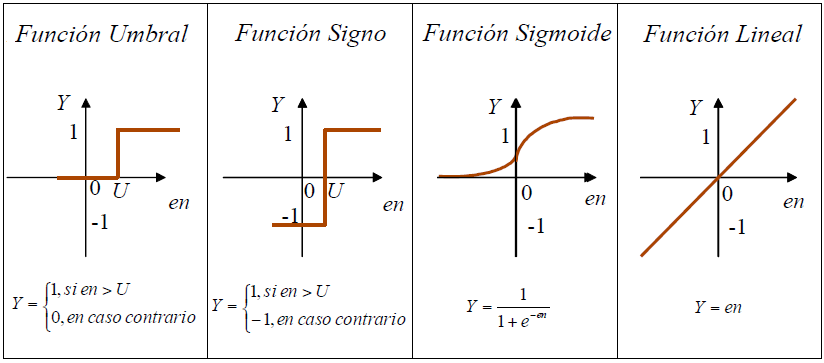

<h2>tangente,hiperbolica/tanh</h2>

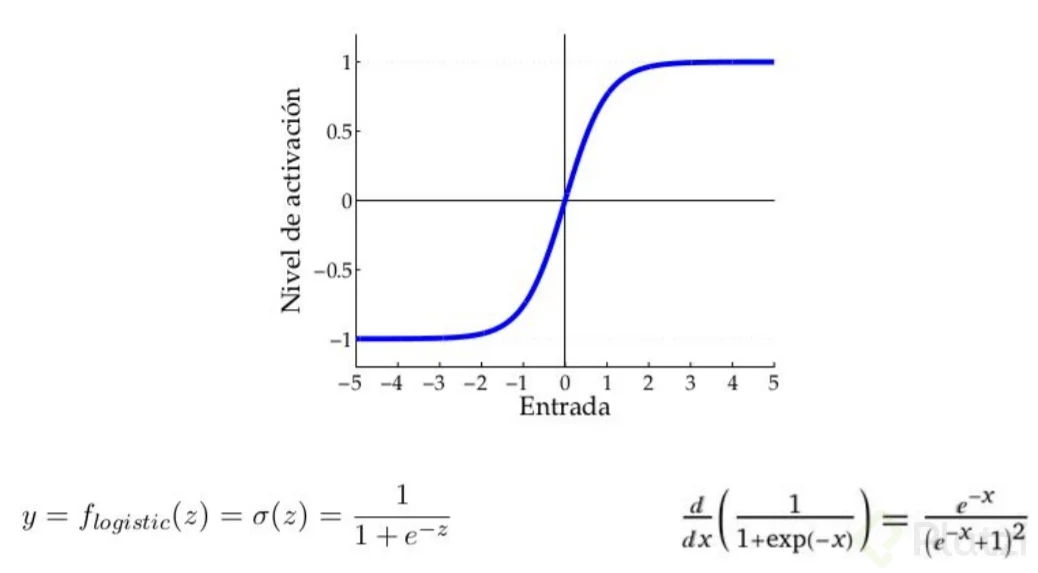

<h2> funcion relu</h2>
una de las funciones mas usadas, esta funcion hace que si el valor por alguna razon es menor a 0, le dara 0 siempre, pero si no, deja el valor que viene. no es una funcion lineal porque esta se deforma cuando los valores son negativos.

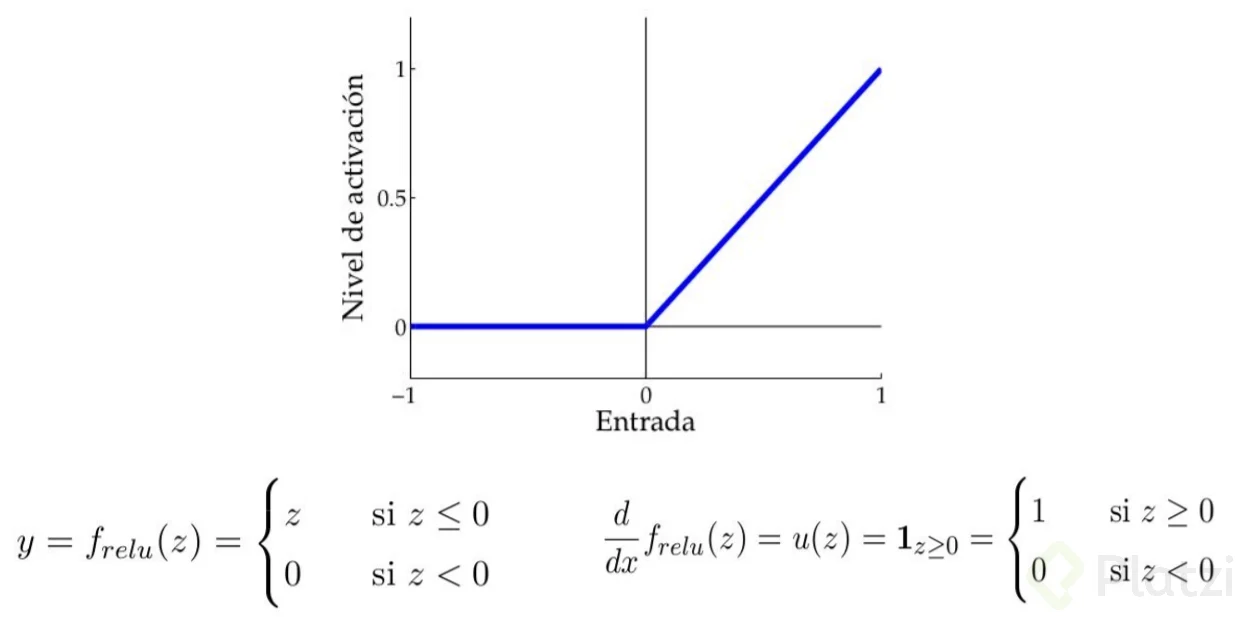

<h2>funcion softmax</h2>
esta funcion lo que hace es darme la probabilidad de cada una de las posibles salidas,
se usa mucho para hacer clasificacion binaria o como clasificacion multiple

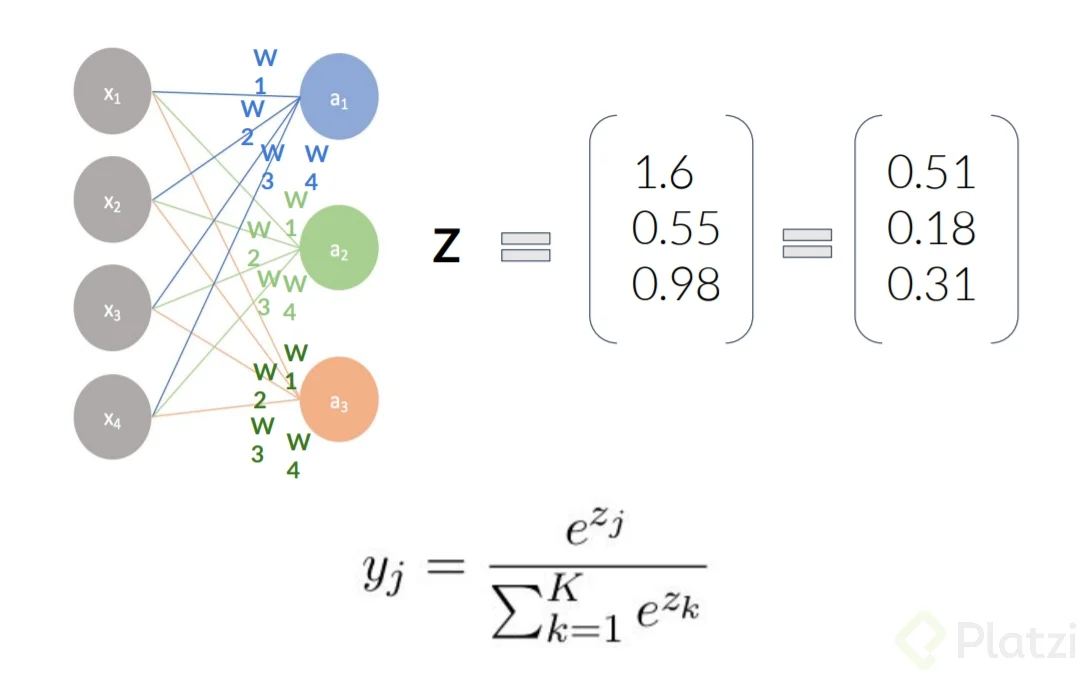

<h1>Loss function (funcion de perdida)</h1>
la funcion de perdida evalua los valores reales contra la prediccion. Un valor alto en la funcion de perdfida indica que nuestras predicciones son malas. En cambio, un valor bajo de la funcion de perdida indica una buena prediccion. Para el caso de una regresion tenemos la funcion de perdida del error cuadratico medio(MSE) y para el caso de las clasificaciones tenemos la de cross entropy.

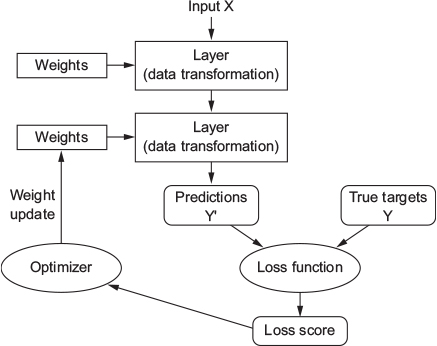

<h1>Descenso del gradiante</h1>
Con este algoritmo buscaremos minimizar la funcion de coste y buscar optimizar los pesos de nuestra red. este es un proceso iterativo donde constantemente la red ira buscando su minimo global.

el objetivo de derivar una funcion es buscar los puntos mas bajos porque un punto bajo en la funcion de perdida nos indica que somos mas precisos en las prediccion respecto al valor real.

<b>Learning rate</b><br>
distancia de los pasos que da cada uno de los pesos podemos hacer pasos muy larglos para encontrar el minimo o pasos muy grandes.

<b>si a(learning rate) :</b> es muy grande corresponde a un procedimiento de descenso del gradiante muy agresivo, donde damos pasos grandes cuesta abajo. ademas si este es demasiado grande quizas nunca encuentre el minimo.

<b>si a(learning rate) :</b> es muy peque√±o, entonces estamos dando pasos de bebe cuesta abajo, esto puede hacer que se demore mucho tiempo y ocupe mas procesos en nuestro equipo.


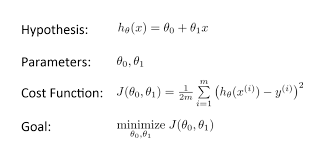

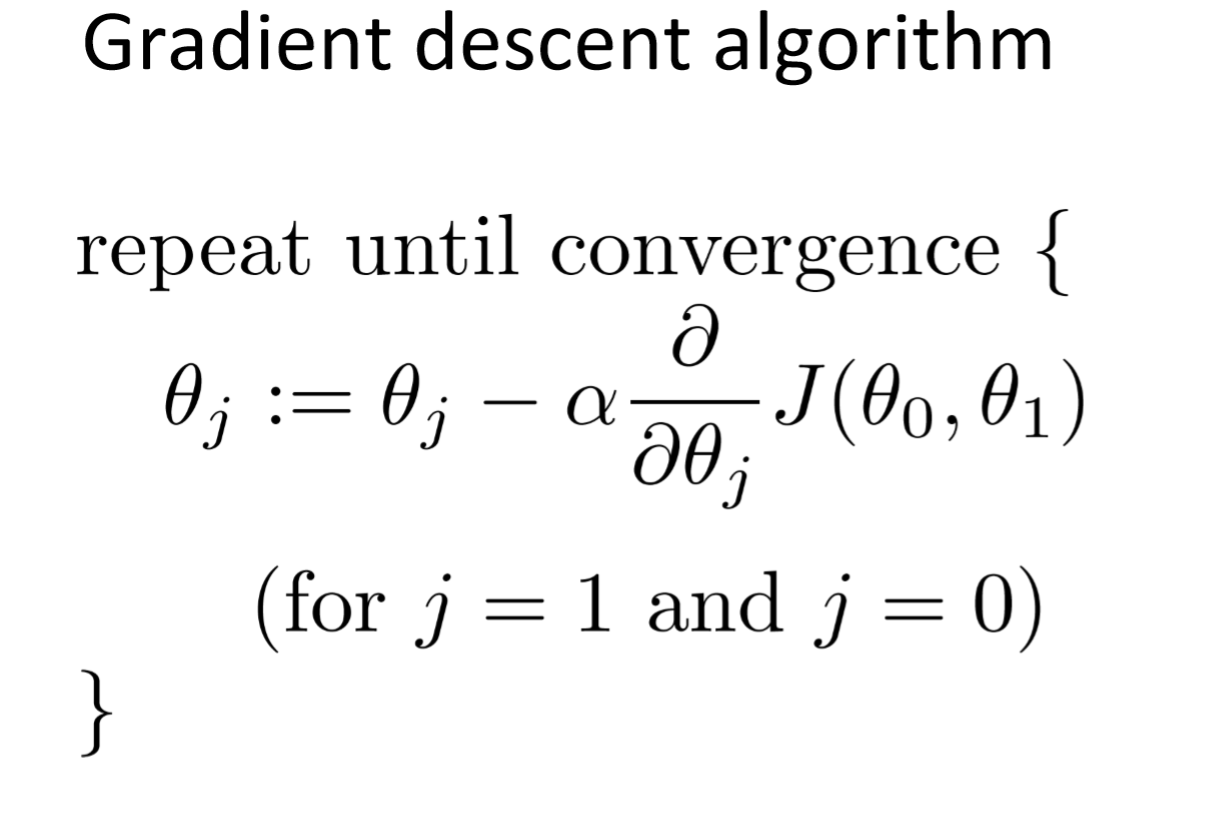


<h1>Backpropagation</h1>
El algoritmo de backpropagation es clave dentro de la arquitectura de la red neuronal, este es un algoritmo de aprendizaje supervisado utilizado para entrenar redes nuronales prealimentadas. 

en palabras simples este algoritmo emplea un ciclo de propagacion-adaptacion de dos fases, permite que la informacion del coto fluya hacia atras atraves de la red para calcular el gradiante.

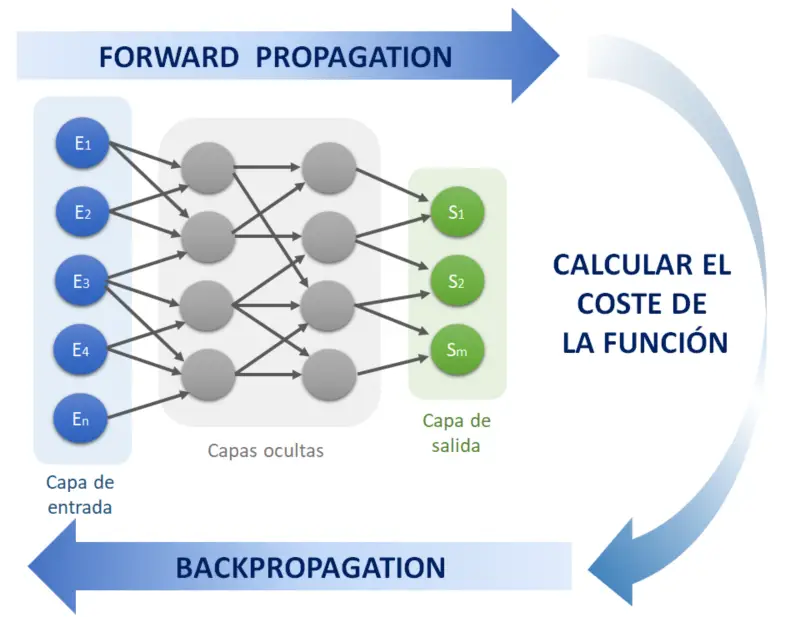

<h1>representacion de datos en las redes neuronales</h1>

<b>scalares => (0d tensors)</b> un tensor contiene solamente un numero llamado scalar,tensor scalar o tensor de 0 dimension. pueden ser float32 or float64.
<br>
<b>Vectores => (1d tensor)</b> un arreglo de numeros es llamado vector o tensor de 1 dimension, este solamente tiene un eje.
<br>
<b>Matrices => (2d tensor)</b> un arreglo de vectores es una matriz o tensor de 2 dimensiones, una matriz tiene 2 ejes.
<br>
<b>3d tensor =></b> si tu empaquetas algunas matrices en un arreglo, tendremos un tensor de 3 dimensiones.

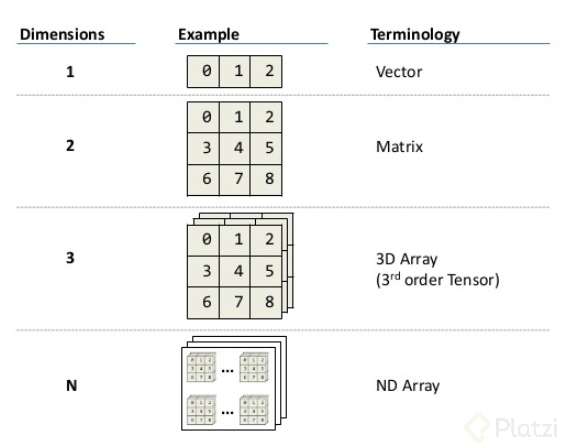


In [1]:
import pandas as pd 
import numpy as np 

In [4]:
#scalar 
scalar = np.array(10)
print(scalar.shape)
scalar.ndim

()


0

In [10]:
#vector
vector = np.array([1,0,10,3])
print(vector.shape)
vector.ndim

(4,)


1

In [11]:
#matrix 
matrix = np.array([[1,2,3,4],
                   [1,2,3,4]])
print(matrix.shape)
matrix.ndim

(2, 4)


2

In [18]:
#3d tensor 
tensor_3d = np.array([[[1,2,3,4],[1,2,3,4],[1,2,3,4]]])
print(tensor_3d.shape)
tensor_3d.ndim

(1, 3, 4)


3

In [24]:
#transformando datos
#vector a matrix 

new_vector = vector
new_matrix = vector.reshape(2,2)
print(new_matrix)
new_matrix.ndim


[[ 1  0]
 [10  3]]


2

<h1>Creacion de la red neuronal usando numpy</h1>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000

mgq = make_gaussian_quantiles(mean=None,
                       cov=0.1,
                       n_samples=N,
                       n_features=2,
                       n_classes=2,
                       shuffle = True,
                       random_state=None)

X,Y = mgq

Y = np.c_[Y]

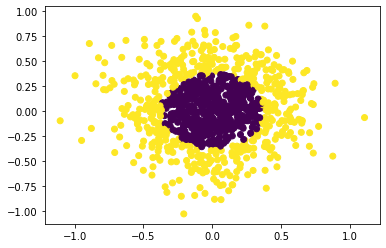

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0])

In [13]:
def sigmoid(x,derivate=False):
    if derivate:
        return np.exp(-x)/((np.exp(-x) +1)**2)
    else: 
        return 1/(1+np.exp(-x))
    
def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

In [14]:
def loss_function(y,y_hat,derivate=False):
    if derivate:
        return 2*(y_hat-y)
    else:
        return np.mean((y_hat-y)**2)

In [15]:
#ahora crear la estructura todas neuronas tiene pesos y bias
def initialize_parameters_deep(layers_dim):
    parameters = {
        
    }
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])*2) -1
        parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1])*2) -1
    return parameters

In [16]:
layers_dims = [2,4,8,1]
params = initialize_parameters_deep(layers_dims)

In [17]:
#mmultiplicacion de matrices
X@params['W1']

array([[-0.27756204,  0.08131981, -0.4032242 ,  0.09731124],
       [-0.06403582, -0.22039676, -0.21632652, -0.17123287],
       [ 0.03350802,  0.0513083 ,  0.0801919 ,  0.03775511],
       ...,
       [-0.14357546, -0.26628127, -0.36754686, -0.1993791 ],
       [ 0.18363747,  0.24163844,  0.41909284,  0.17488205],
       [-0.04172607, -0.18738463, -0.16352691, -0.14702601]])

In [32]:
def train(x_data,lr,params,training = True):
##forward
    params['A0'] = x_data 

    params['Z1'] = np.matmul(params['A0'],params['W1'])+params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['W2'])+params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['W3'])+params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']


    if training : 
##backpropagation

        params['dZ3'] = loss_function(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

##gradient descent

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - np.mean(params['dW3'],axis=0,keepdims=True) * lr
    
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - np.mean(params['dW2'],axis=0,keepdims=True) * lr

        params['W1'] = params['W1'] - params['dW1'] * 0.001
        params['b1'] = params['b1'] - np.mean(params['dW1'],axis=0,keepdims=True) * lr

    return output

In [45]:
layers_dims = [2,4,8,1]
params = initialize_parameters_deep(layers_dims)
errors = []

for _ in range(100000):
    output = train(X,0.0001,params)
    if _ % 50 == 0:
        print(loss_function(Y,output))
        errors.append(loss_function(Y,output))

0.25255143716931894
0.24622308215535454
0.2393948675993533
0.2200802000297866
0.2092662418325621
0.20429349354367773
0.19983565916121654
0.1951302083777005
0.1906464175232736
0.18650326175318044
0.18279982818259927
0.17964496528443466
0.17709707639334624
0.17504267321495764
0.1733493954021144
0.17194167198128507
0.1708040376635663
0.16985947865777473
0.16906957118009047
0.1683916195745722
0.16776123722719885
0.167105864376352
0.16600414432471564
0.1637931280556795
0.15895889193731466
0.15005042292777637
0.135370087128217
0.12141494873089448
0.11008890548809408
0.1021440875050513
0.09636588740250594
0.09209414385363408
0.08842459587453612
0.08535274499235251
0.08272410215800637
0.08038906810799741
0.07843878652812154
0.0767258312775804
0.07510896915805718
0.07356481980139996
0.07203416852114011
0.07064989980123332
0.06940948054054255
0.06826327023665331
0.0671785040792881
0.06615518940724502
0.06523859076628719
0.06430497773766902
0.0633909141866786
0.06254000775334148
0.061753446771909

0.025499648664084013
0.02548555691753343
0.025471614289068384
0.02545780210249977
0.025444134867291614
0.025430571294592398
0.02541737808790627
0.02540444216591748
0.02539150517121758
0.025378607108254337
0.025365784259402845
0.025353023019303228
0.025340396040620026
0.02532765900172569
0.02531470289958626
0.025302242815352472
0.025289580914765117
0.025277322548658648
0.02526502351554746
0.02525274757425107
0.025240504461392255
0.025228348405473507
0.02521624224245567
0.025204199358839136
0.025192443888596684
0.025180577276553463
0.025168764242038264
0.02515704553199564
0.02514537155578347
0.025133714684345065
0.025122147580974176
0.02511064842185066
0.025099509935569312
0.025087838235708808
0.025076507734170483
0.025065226810464202
0.02505409152215029
0.025043002320730815
0.025031890296973842
0.025020860600377524
0.025010086764734082
0.024999036045231165
0.02498817219117465
0.024977580010945178
0.02496685022848378
0.024956153429625857
0.02494551064701872
0.02493489888589601
0.02492441

0.02292118700023228
0.02291845692416347
0.02291574236616231
0.02291303275034999
0.022910300318839012
0.022907636692547816
0.02290496733038796
0.02290236089543447
0.022899608162679365
0.022896941585010617
0.022894345247791294
0.02289171907253799
0.022889190941565368
0.02288636134319581
0.02288382406920129
0.022881419286274074
0.02287882666877502
0.022876234931223195
0.022873630845079866
0.02287065504246349
0.022868075571959443
0.022865982471699037
0.022863389049286743
0.02286086008634769
0.022857912351400486
0.022855495930661676
0.02285283251958766
0.022850452322008045
0.02284781358888531
0.022845293903003324
0.02284294679847377
0.02284027193471773
0.022837765262427416
0.02283528517903609
0.022832787084970923
0.02283031651845651
0.022827831279742368
0.022825375206064848
0.02282289687634136
0.022820564315013964
0.022818003980676013
0.022815958736082883
0.02281351624999266
0.022810702253616533
0.022808573323325098
0.022806157640772737
0.022803763704151984
0.022801356713589738
0.0227989438

0.02216582031014211
0.022164851123543508
0.02216398600068409
0.022163104473303955
0.02216216150852232
0.022161210873048974
0.02216027864674888
0.022159365140394783
0.022158498274269044
0.022157580320960876
0.022156666226395262
0.022155854428944258
0.022154908262379095
0.022153931317540763
0.02215290973892362
0.022151934577418892
0.022151092496132896
0.02215016796678947
0.02214936827303462
0.022148490966759055
0.022147608582948296
0.02214669434150276
0.02214567824566494
0.02214479365919839
0.022143803483133963
0.022142930307738083
0.02214197538484283
0.022141101940807876
0.02214027870561897
0.022139156476262727
0.022138153708346313
0.02213726189691608
0.02213623202140124
0.022135367375961664
0.022134490936176907
0.022133562127342674
0.02213272767587992
0.022131829949851474
0.0221309799962446
0.022130211576123937
0.022129439397424136
0.022128902972760555
0.022128426529516198
0.02212888771142178
0.02213680528766536
0.022208790130135565
0.02280554090252766
0.024395255914484593
0.0246368531

0.02245406564081425
0.022453281829750413
0.022452490373156705
0.022451422679140298
0.022450648677004074
0.02244959178920805
0.02244880851501626
0.022447598454379925
0.022446949663909678
0.022461242541405822
0.022468895638756155
0.022468941506792385
0.022466441316398685
0.022463832977842168
0.022460844946502908
0.022458318743749664
0.022455684650718368
0.022453467435095072
0.02245150243887735
0.02244926555546064
0.022447433932072037
0.02244537351733515
0.02244381619318576
0.022441939350863173
0.02244051698618886
0.022439075435722978
0.022437122871062674
0.022431683539343928
0.02242611490072629
0.022406422101989263
0.022393781150255875
0.022389382802522114
0.022387705660794642
0.022386776714438013
0.022386392118832463
0.022386260342565606
0.022386191050564917
0.022387946527883822
0.022389477981633838
0.022397540665652634
0.022423802304916307
0.022435380934932112
0.02243646766805996
0.022434164047344468
0.022431425255772033
0.02242840158779864
0.022425871261995755
0.02241418249118719
0.02

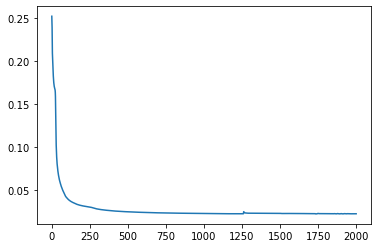

In [46]:
plt.plot(errors)

In [47]:
#red test
data_test = (np.random.rand(1000,2)*2) - 1 
y = train(data_test,0.0001,params,training=False)

In [48]:
y = np.where(y>= 0.5,1,0)

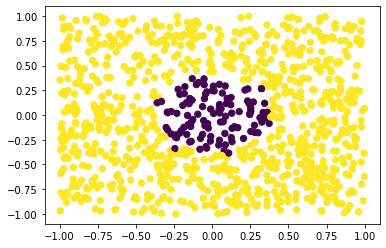

In [49]:
plt.scatter(data_test[:,0],data_test[:,1],c=y[:,0],s=40)

<h1>clasificacion binaria</h1>


In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models,layers,optimizers

2022-11-05 21:03:04.081206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_labels[0]

1

In [4]:
word_index = imdb.get_word_index()

In [5]:
word_index = dict([value,key] for (key,value) in word_index.items())

In [6]:
for _ in train_data[0]:
    print(word_index.get(_ -3 ))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [7]:
#vectorizar 
def vectorizar(seq,dim=10000):
    results = np.zeros((len(seq),dim))
    for i,s in enumerate(seq):
        results[i,s] = 1 
    return results

In [8]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
#creacion de modelo 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-05 21:03:20.693689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy') 

In [12]:
#creacion de varioable de validacion
X_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
#entrenar modelo

history = model.fit(partial_x_train,partial_y_train,
                   epochs=20,batch_size=512,
                   validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0306 - accuracy: 0.9955 - val_loss: 0.4464 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0264 - accuracy: 0.9964 - val_loss: 0.4694 - val_accuracy: 0.8716
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0229 - accuracy: 0.9965 - val_loss: 0.4888 - val_accuracy: 0.8714
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0192 - accuracy: 0.9973 - val_loss: 0.5096 - val_accuracy: 0.8692
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0169 - accuracy: 0.9977 - val_loss: 0.5450 - val_accuracy: 0.8693
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0144 - accuracy: 0.9980 - val_loss: 0.5733 - val_accuracy: 0.8685
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.5920 - val_accuracy: 0.8693
Epoch 8/20
30

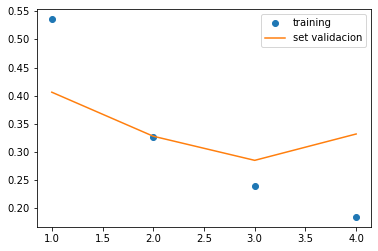

In [14]:
#resultados

import matplotlib.pyplot as plt 



history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = range(1,len(loss_values)+1)

plt.plot(epoch,loss_values,'o',label='training')
plt.plot(epoch,val_loss_values,label='set validacion')

plt.legend()

In [15]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3453 - accuracy: 0.8562


[0.3453129231929779, 0.8562399744987488]

<h1>Regularizacion </h1>
overfiting se presenta cuando el algoritmo se aprende los datos.<br>
underfiting el modelo no es suficientemente listo para resolver el problema.

<h1>regularizacion</h1>

L1 y L2
<br>

dropout->. desconeta o apaga un % de neuronas para cada iteracion. esto es para evitar la dependecia entre neuronas.

In [26]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history2 = model2.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6639 - accuracy: 0.6773 - val_loss: 0.6282 - val_accuracy: 0.8175
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5873 - accuracy: 0.8399 - val_loss: 0.5558 - val_accuracy: 0.8487
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5074 - accuracy: 0.8719 - val_loss: 0.4866 - val_accuracy: 0.8552
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4351 - accuracy: 0.8845 - val_loss: 0.4280 - val_accuracy: 0.8655
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3733 - accuracy: 0.8959 - val_loss: 0.3806 - val_accuracy: 0.8737
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3226 - accuracy: 0.9065 - val_loss: 0.3476 - val_accuracy: 0.8756
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2819 - accuracy: 0.9145 - val_loss: 0.3193 - val_accuracy: 0.8817
Epoch 8/20
30

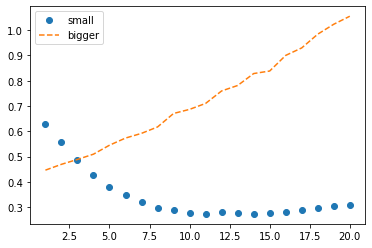

In [27]:
import matplotlib.pyplot as plt 



history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']

epoch = range(1,len(loss_values)+1)

plt.plot(epoch, val_loss_values_2,'o',label='small')
plt.plot(epoch, val_loss_values,'--',label='bigger')

plt.legend()

In [29]:
#aplicando l2 

from keras import regularizers

model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)
                       ,kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',
                       kernel_regularizer= regularizers.l1(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history3 = model3.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5796 - accuracy: 0.7779 - val_loss: 0.4548 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3812 - accuracy: 0.8995 - val_loss: 0.3925 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3150 - accuracy: 0.9199 - val_loss: 0.3747 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2776 - accuracy: 0.9343 - val_loss: 0.3544 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2536 - accuracy: 0.9435 - val_loss: 0.3718 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2378 - accuracy: 0.9487 - val_loss: 0.3604 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2237 - accuracy: 0.9551 - val_loss: 0.3688 - val_accuracy: 0.8846
Epoch 8/20
30

In [31]:
#drop out
model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

history4 = model4.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6739 - accuracy: 0.5531 - val_loss: 0.6281 - val_accuracy: 0.7316
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.6335 - accuracy: 0.6041 - val_loss: 0.5613 - val_accuracy: 0.8510
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.6031 - accuracy: 0.6347 - val_loss: 0.5344 - val_accuracy: 0.8651
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5829 - accuracy: 0.6555 - val_loss: 0.4965 - val_accuracy: 0.8762
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5654 - accuracy: 0.6726 - val_loss: 0.4612 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5552 - accuracy: 0.6732 - val_loss: 0.4571 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5339 - accuracy: 0.6907 - val_loss: 0.4159 - val_accuracy: 0.8848
Epoch 8/20
30

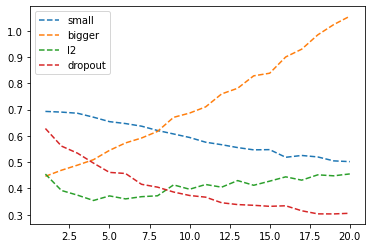

In [32]:
import matplotlib.pyplot as plt 



history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']
val_loss_values_3 = history3.history['val_loss']
val_loss_values_4 = history4.history['val_loss']

epoch = range(1,len(loss_values)+1)

plt.plot(epoch, val_loss_values_2,'--',label='small')
plt.plot(epoch, val_loss_values,'--',label='bigger')
plt.plot(epoch, val_loss_values_3,'--',label='l2')
plt.plot(epoch, val_loss_values_4,'--',label='dropout')
plt.legend()

<h1>Resolviendo clasificacion multiple</h1>
topicos de noticias

In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

2022-11-07 09:03:16.020558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [9]:
word_index = reuters.get_word_index()
word_index = dict([value,key] for (key,value) in word_index.items())
for _ in train_data[0]:
    print(word_index.get(_))

the
of
of
mln
loss
for
plc
said
at
only
ended
said
commonwealth
could
1
traders
now
april
0
a
after
said
from
1985
and
from
foreign
000
april
0
prices
its
account
year
a
but
in
this
mln
home
an
states
earlier
and
rise
and
revs
vs
000
its
16
vs
000
a
but
3
psbr
oils
several
and
shareholders
and
dividend
vs
000
its
all
4
vs
000
1
mln
agreed
largely
april
0
are
2
states
will
billion
total
and
against
000
pct
dlrs


In [11]:
#vectorizar 
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences),dim))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1 
    return results

In [43]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [44]:
from keras.utils import to_categorical

In [45]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [47]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [48]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [49]:
history = model.fit(partial_x_train,partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.6513 - accuracy: 0.5234 - val_loss: 1.7458 - val_accuracy: 0.6630
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3999 - accuracy: 0.7182 - val_loss: 1.2782 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0205 - accuracy: 0.7835 - val_loss: 1.1377 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8086 - accuracy: 0.8264 - val_loss: 1.0257 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6483 - accuracy: 0.8631 - val_loss: 0.9665 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5187 - accuracy: 0.8919 - val_loss: 0.9288 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4217 - accuracy: 0.9136 - val_loss: 0.8976 - val_accuracy: 0.8160
Epoch 8/20
16

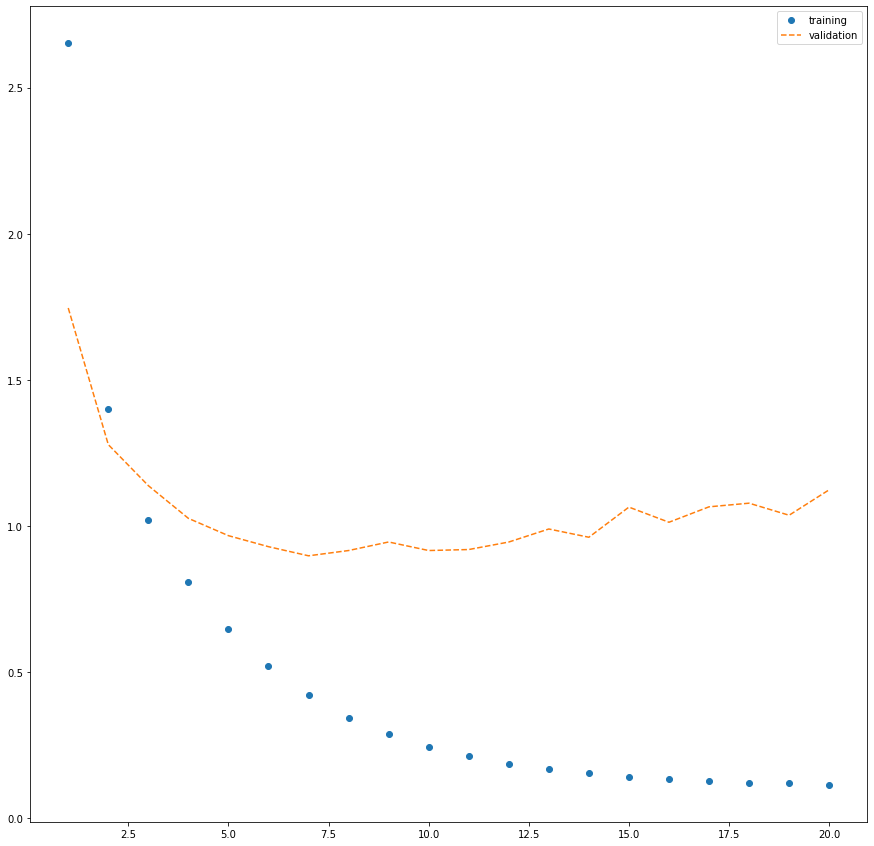

In [50]:
import matplotlib.pyplot as plt 


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epoch = range(1,len(loss_values)+1)



fig = plt.figure(figsize=(15,15))
plt.plot(epoch, loss_values,'o',label='training')
plt.plot(epoch, val_loss_values,'--',label='validation')

plt.legend()



In [53]:
predictions = model.predict(x_test)
predictions[0]

71/71 [==============================] - 0s 1ms/step


array([1.4536199e-06, 4.7141949e-08, 2.7959196e-08, 9.8769695e-01,
       1.2098209e-02, 2.5096043e-08, 2.2905220e-09, 1.9475480e-07,
       3.3484790e-05, 8.5117500e-07, 2.1735754e-07, 8.6127047e-06,
       4.2436537e-07, 3.6582878e-06, 8.3781098e-09, 2.2741775e-11,
       4.0486196e-07, 2.4541887e-07, 1.0555293e-07, 6.5493114e-05,
       5.7866851e-05, 5.1810725e-06, 6.8797272e-07, 1.8559838e-08,
       6.0239342e-09, 3.6057455e-07, 1.3080881e-09, 5.9775003e-09,
       1.1736490e-07, 2.3839170e-06, 3.3506781e-06, 3.2956994e-08,
       2.4930659e-06, 4.4311211e-11, 2.0428540e-06, 1.1417250e-09,
       1.0559494e-05, 6.6732071e-07, 2.8429096e-07, 3.4245447e-06,
       6.7211164e-10, 1.4472052e-07, 4.0094239e-09, 2.7749686e-10,
       2.5410238e-11, 2.2266273e-09], dtype=float32)

<h1>regresion</h1>

In [2]:
import pandas as pd 
import numpy as np
from keras.datasets import boston_housing
from keras import layers,models,optimizers

In [6]:
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [15]:
#normalizacion

mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

In [28]:
def build_model_regression(lr,input_data):

    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer= optimizers.RMSprop(lr=0.001),loss='mse',metrics = ['mae'])
    return model

In [29]:
k = 4 # 4 set de validacion 
num_val_samples = len(train_data) // k 
num_epoch = 80
all_history = []

In [31]:
for i in range(k):
    print('fold : ', i)
    val_data = train_data[i*num_val_samples : (i+1)  * num_val_samples]
    val_target = train_labels[i*num_val_samples : (i+1)  * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],
    axis=0
    )
    
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i+1) * num_val_samples:]],
    axis=0
    )
    
    model = build_model_regression(0.001,13)
    history = model.fit(partial_train_data, partial_train_targets,
                       epochs=num_epoch,
                       batch_size= 16,
                       validation_data=(val_data,val_target),
                       )
    all_history.append(history.history['mae'])

fold :  0
Epoch 1/80


/Users/patodev/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 0s 6ms/step - loss: 513.5511 - mae: 20.8214 - val_loss: 424.1267 - val_mae: 18.4186
Epoch 2/80
19/19 [==============================] - 0s 2ms/step - loss: 382.0716 - mae: 17.5622 - val_loss: 280.8902 - val_mae: 14.5400
Epoch 3/80
19/19 [==============================] - 0s 2ms/step - loss: 241.0401 - mae: 13.4370 - val_loss: 146.2875 - val_mae: 9.8627
Epoch 4/80
19/19 [==============================] - 0s 2ms/step - loss: 125.6990 - mae: 9.0941 - val_loss: 67.7866 - val_mae: 6.3663
Epoch 5/80
19/19 [==============================] - 0s 2ms/step - loss: 66.1098 - mae: 6.3554 - val_loss: 41.5067 - val_mae: 4.8525
Epoch 6/80
19/19 [==============================] - 0s 2ms/step - loss: 40.8492 - mae: 4.8215 - val_loss: 29.5451 - val_mae: 3.9263
Epoch 7/80
19/19 [==============================] - 0s 2ms/step - loss: 29.4237 - mae: 3.9800 - val_loss: 23.0482 - val_mae: 3.2979
Epoch 8/80
19/19 [==============================] - 0s 2ms/step - loss: 23.

19/19 [==============================] - 0s 2ms/step - loss: 7.9979 - mae: 1.9327 - val_loss: 7.8127 - val_mae: 2.0602
Epoch 64/80
19/19 [==============================] - 0s 2ms/step - loss: 7.8526 - mae: 1.9535 - val_loss: 7.6637 - val_mae: 2.0007
Epoch 65/80
19/19 [==============================] - 0s 2ms/step - loss: 7.6453 - mae: 1.9643 - val_loss: 7.6987 - val_mae: 1.9751
Epoch 66/80
19/19 [==============================] - 0s 2ms/step - loss: 7.5312 - mae: 1.9299 - val_loss: 8.9335 - val_mae: 2.1220
Epoch 67/80
19/19 [==============================] - 0s 2ms/step - loss: 7.4920 - mae: 1.9070 - val_loss: 7.8042 - val_mae: 1.9313
Epoch 68/80
19/19 [==============================] - 0s 2ms/step - loss: 7.4039 - mae: 1.9003 - val_loss: 7.7719 - val_mae: 2.0591
Epoch 69/80
19/19 [==============================] - 0s 2ms/step - loss: 7.4337 - mae: 1.9060 - val_loss: 8.3904 - val_mae: 2.0781
Epoch 70/80
19/19 [==============================] - 0s 2ms/step - loss: 7.4343 - mae: 1.9026 -

Epoch 45/80
19/19 [==============================] - 0s 2ms/step - loss: 7.8589 - mae: 2.0144 - val_loss: 10.5812 - val_mae: 2.4682
Epoch 46/80
19/19 [==============================] - 0s 2ms/step - loss: 7.7649 - mae: 1.9474 - val_loss: 11.0405 - val_mae: 2.5194
Epoch 47/80
19/19 [==============================] - 0s 2ms/step - loss: 7.8292 - mae: 1.9407 - val_loss: 11.4761 - val_mae: 2.6666
Epoch 48/80
19/19 [==============================] - 0s 2ms/step - loss: 7.6479 - mae: 1.9882 - val_loss: 10.5175 - val_mae: 2.4813
Epoch 49/80
19/19 [==============================] - 0s 2ms/step - loss: 7.5818 - mae: 1.9340 - val_loss: 10.8079 - val_mae: 2.5162
Epoch 50/80
19/19 [==============================] - 0s 2ms/step - loss: 7.5359 - mae: 1.9406 - val_loss: 10.4960 - val_mae: 2.4717
Epoch 51/80
19/19 [==============================] - 0s 2ms/step - loss: 7.2084 - mae: 1.9147 - val_loss: 10.9986 - val_mae: 2.5663
Epoch 52/80
19/19 [==============================] - 0s 2ms/step - loss: 7.2

Epoch 27/80
19/19 [==============================] - 0s 2ms/step - loss: 9.6039 - mae: 2.2338 - val_loss: 16.6969 - val_mae: 2.6604
Epoch 28/80
19/19 [==============================] - 0s 2ms/step - loss: 9.3335 - mae: 2.1469 - val_loss: 16.3472 - val_mae: 2.7383
Epoch 29/80
19/19 [==============================] - 0s 2ms/step - loss: 9.0998 - mae: 2.1795 - val_loss: 16.0793 - val_mae: 2.6826
Epoch 30/80
19/19 [==============================] - 0s 2ms/step - loss: 8.9022 - mae: 2.1217 - val_loss: 16.0140 - val_mae: 2.6511
Epoch 31/80
19/19 [==============================] - 0s 2ms/step - loss: 8.8040 - mae: 2.1342 - val_loss: 16.1248 - val_mae: 2.6596
Epoch 32/80
19/19 [==============================] - 0s 2ms/step - loss: 8.6337 - mae: 2.1334 - val_loss: 16.0843 - val_mae: 2.7400
Epoch 33/80
19/19 [==============================] - 0s 2ms/step - loss: 8.4401 - mae: 2.1127 - val_loss: 15.7586 - val_mae: 2.6576
Epoch 34/80
19/19 [==============================] - 0s 2ms/step - loss: 8.4

Epoch 9/80
19/19 [==============================] - 0s 2ms/step - loss: 26.2395 - mae: 3.5581 - val_loss: 39.0672 - val_mae: 4.2826
Epoch 10/80
19/19 [==============================] - 0s 2ms/step - loss: 23.2423 - mae: 3.2488 - val_loss: 31.8088 - val_mae: 4.0270
Epoch 11/80
19/19 [==============================] - 0s 2ms/step - loss: 21.1491 - mae: 3.1391 - val_loss: 31.7352 - val_mae: 3.8124
Epoch 12/80
19/19 [==============================] - 0s 2ms/step - loss: 19.5942 - mae: 2.9497 - val_loss: 27.9668 - val_mae: 3.6610
Epoch 13/80
19/19 [==============================] - 0s 2ms/step - loss: 17.9526 - mae: 2.8212 - val_loss: 25.1428 - val_mae: 3.5569
Epoch 14/80
19/19 [==============================] - 0s 2ms/step - loss: 16.7255 - mae: 2.7454 - val_loss: 24.4973 - val_mae: 3.4643
Epoch 15/80
19/19 [==============================] - 0s 2ms/step - loss: 15.6024 - mae: 2.6281 - val_loss: 22.7353 - val_mae: 3.3930
Epoch 16/80
19/19 [==============================] - 0s 2ms/step - los

Epoch 71/80
19/19 [==============================] - 0s 2ms/step - loss: 6.4980 - mae: 1.7549 - val_loss: 10.9130 - val_mae: 2.4083
Epoch 72/80
19/19 [==============================] - 0s 2ms/step - loss: 6.5441 - mae: 1.7731 - val_loss: 11.1216 - val_mae: 2.4188
Epoch 73/80
19/19 [==============================] - 0s 2ms/step - loss: 6.5294 - mae: 1.7533 - val_loss: 10.9603 - val_mae: 2.3920
Epoch 74/80
19/19 [==============================] - 0s 2ms/step - loss: 6.5324 - mae: 1.7571 - val_loss: 11.0063 - val_mae: 2.3931
Epoch 75/80
19/19 [==============================] - 0s 2ms/step - loss: 6.4391 - mae: 1.7489 - val_loss: 11.4209 - val_mae: 2.4476
Epoch 76/80
19/19 [==============================] - 0s 2ms/step - loss: 6.2406 - mae: 1.7136 - val_loss: 10.7701 - val_mae: 2.3801
Epoch 77/80
19/19 [==============================] - 0s 2ms/step - loss: 6.3473 - mae: 1.7289 - val_loss: 10.8124 - val_mae: 2.3625
Epoch 78/80
19/19 [==============================] - 0s 2ms/step - loss: 6.2

In [37]:
len(all_history[0])

all_mae_avg = pd.DataFrame(all_history).mean(axis=0)
all_mae_avg

0     20.678342
1     17.558599
2     13.599320
3      9.463392
4      6.712187
        ...    
75     1.751598
76     1.766787
77     1.745167
78     1.753773
79     1.737181
Length: 80, dtype: float64

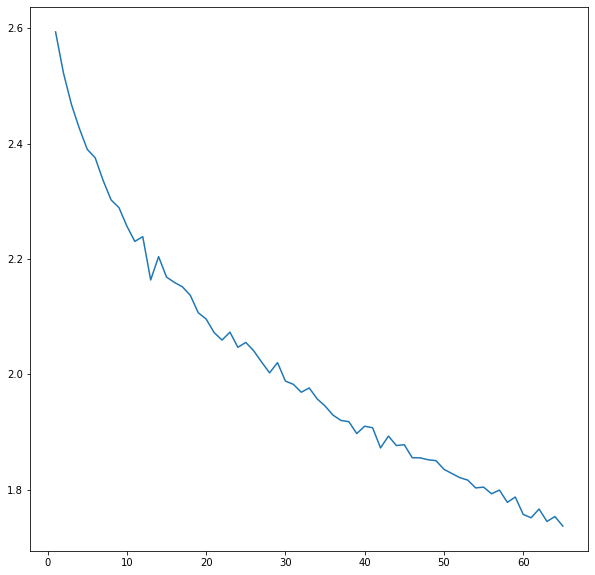

In [39]:
#visualizando datos

import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

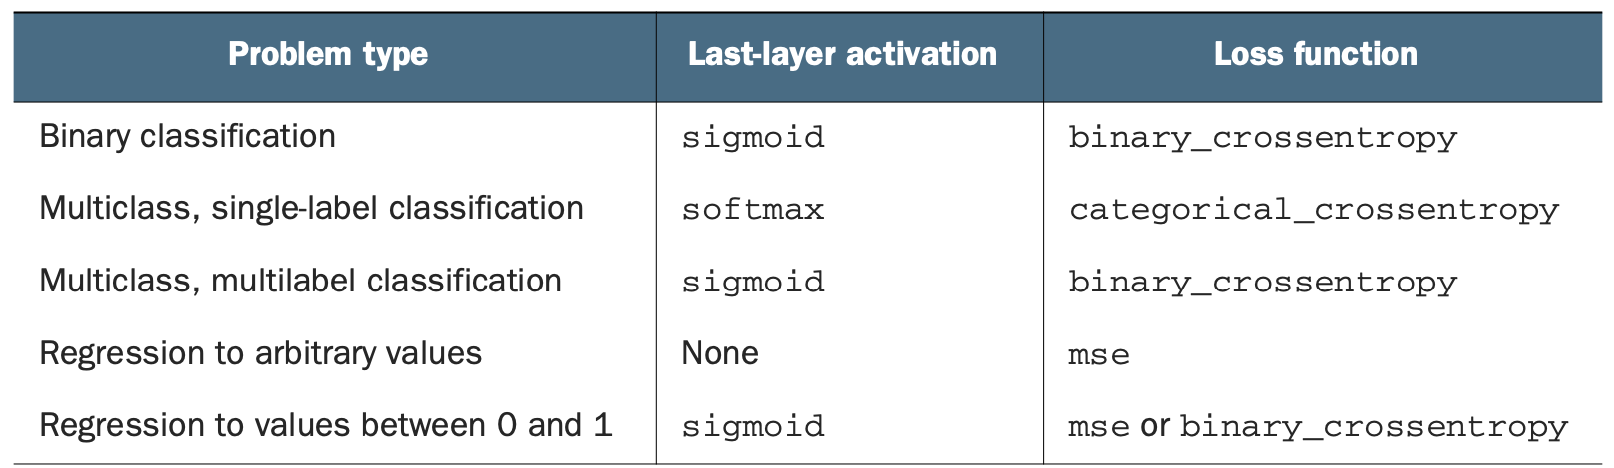
